In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
from PIL import Image
from io import BytesIO

In [ ]:
df_train=pd.read_csv("test.csv")
df_train

,index,image_link,group_id,entity_name
0,0,https://m.media-amazon.com/images/I/110EibNycl...,156839,height
1,1,https://m.media-amazon.com/images/I/11TU2clswz...,792578,width
2,2,https://m.media-amazon.com/images/I/11TU2clswz...,792578,height
3,3,https://m.media-amazon.com/images/I/11TU2clswz...,792578,depth
4,4,https://m.media-amazon.com/images/I/11gHj8dhhr...,792578,depth
...,...,...,...,...
131182,131283,https://m.media-amazon.com/images/I/A1rVsIzEtk...,721522,maximum_weight_recommendation
131183,131284,https://m.media-amazon.com/images/I/A1rdvZ5zDd...,603688,item_weight
131184,131285,https://m.media-amazon.com/images/I/A1rdvZ5zDd...,603688,maximum_weight_recommendation
131185,131286,https://m.media-amazon.com/images/I/A1tnTUPyr7...,853009,item_weight


In [ ]:
df_train.isnull().sum() #No missing value

,0
index,0
image_link,0
group_id,0
entity_name,0


In [ ]:
df_train.shape

(263859, 4)

In [ ]:
df_train.columns

Index(['image_link', 'group_id', 'entity_name', 'entity_value'], dtype='object')

In [ ]:
print("Number of unique value:",df_train.entity_name.nunique())
print("Unique values:",df_train.entity_name.unique())

Number of unique value: 8
Unique values: ['item_weight' 'item_volume' 'voltage' 'wattage'
 'maximum_weight_recommendation' 'height' 'depth' 'width']


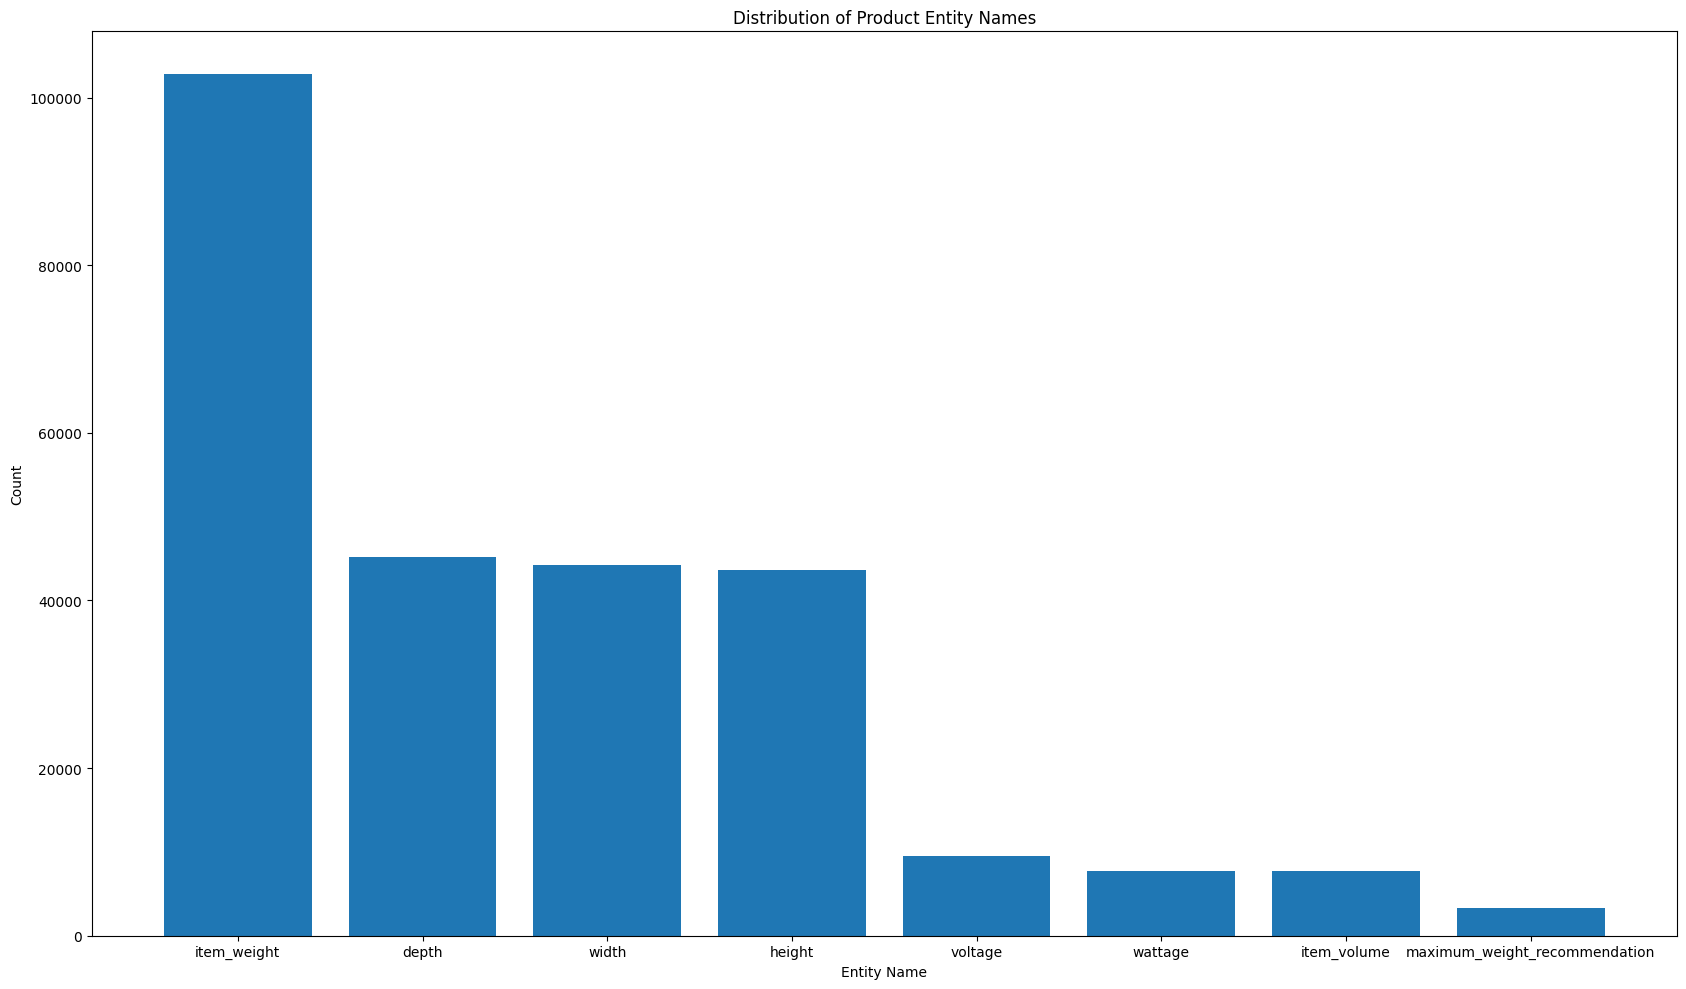

In [ ]:
plt.figure(figsize=(17, 10))
plt.bar(df_train['entity_name'].value_counts().index, df_train['entity_name'].value_counts().values)
plt.title('Distribution of Product Entity Names')
plt.xlabel('Entity Name')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

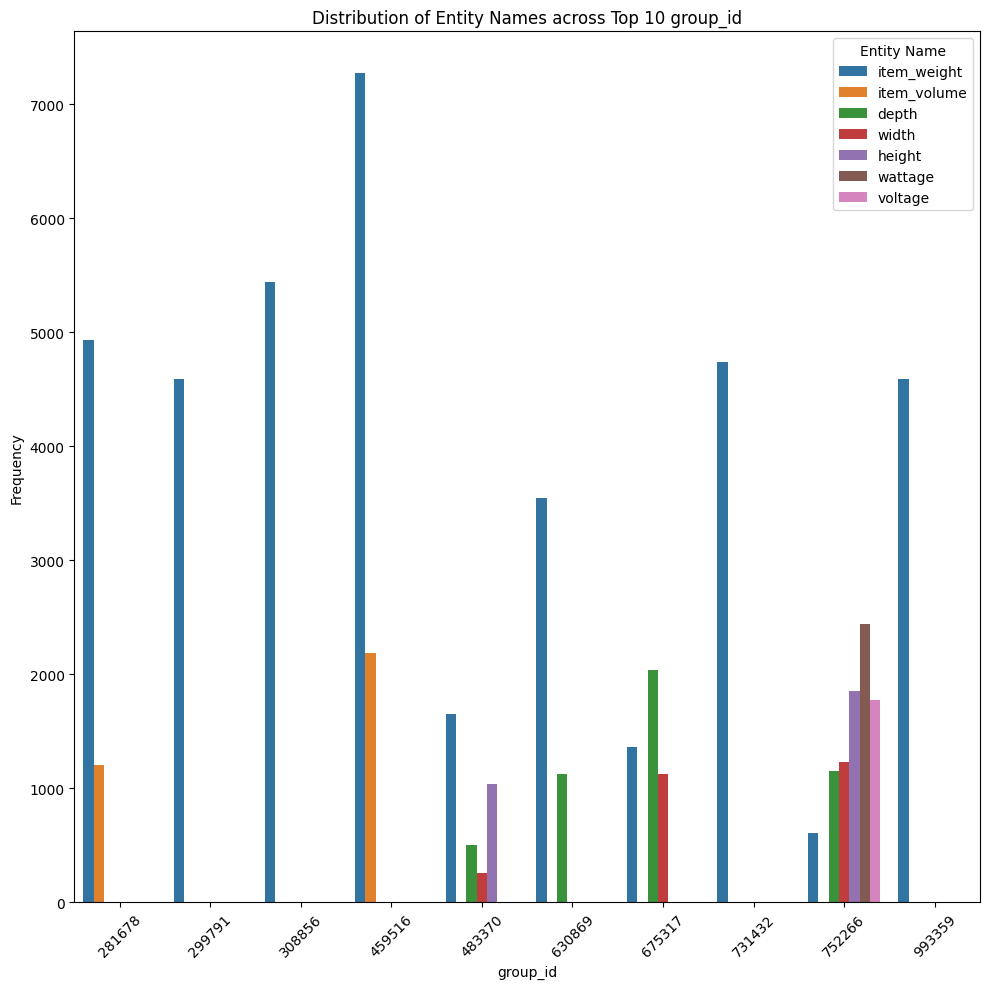

In [ ]:
df=df_train
plt.figure(figsize=(10, 10))
top_group_ids = df['group_id'].value_counts().head(10).index
sns.countplot(x='group_id', hue='entity_name', data=df[df['group_id'].isin(top_group_ids)])
plt.title('Distribution of Entity Names across Top 10 group_id')
plt.xlabel('group_id')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Entity Name')
plt.tight_layout()
plt.show()

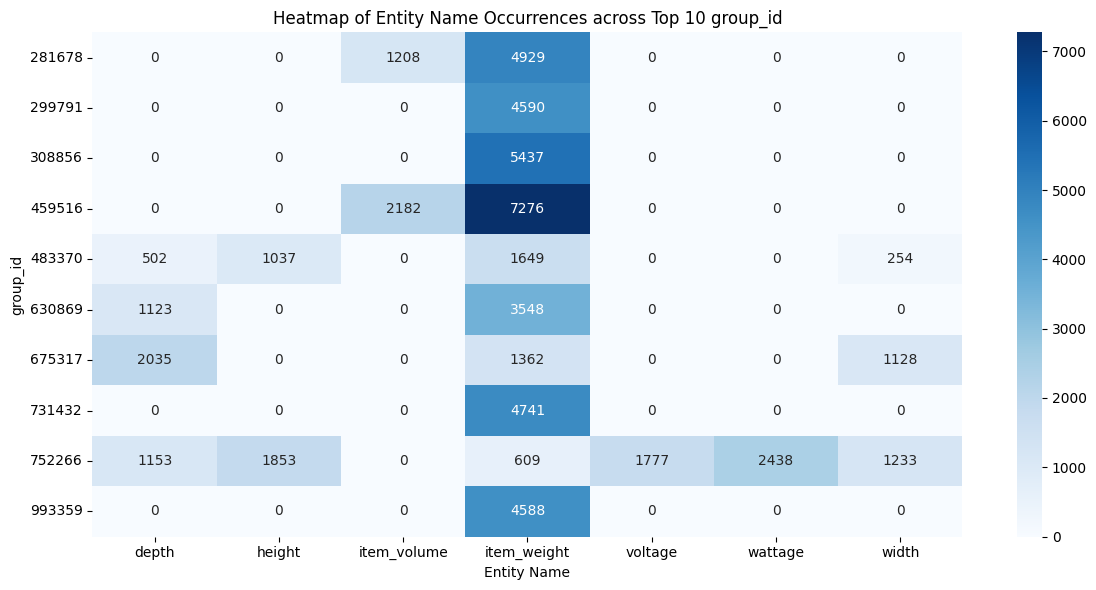

In [ ]:
top_group_ids = df['group_id'].value_counts().head(10).index
pivot_table = df[df['group_id'].isin(top_group_ids)].pivot_table(index='group_id', columns='entity_name', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="Blues")
plt.title('Heatmap of Entity Name Occurrences across Top 10 group_id')
plt.ylabel('group_id')
plt.xlabel('Entity Name')
plt.tight_layout()
plt.show()

In [ ]:
i=0
itt=list()
for j in df_train['entity_name']:
    if j=="item_volume":
        itt.append(df_train.iloc[i]["entity_value"])
    i=i+1

In [ ]:
itt[:10]

['1.0 cup',
 '4.0 gallon',
 '10.0 ounce',
 '30.0 millilitre',
 '30.0 millilitre',
 '30.0 millilitre',
 '30.0 millilitre',
 '30.0 millilitre',
 '3.0 cubic foot',
 '500.0 millilitre']

In [ ]:
pip install paddlepaddle-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.9/758.9 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.9 MB/s eta 0:00:00


PaddleOCR (This is faster i guess)

In [ ]:
pip install paddleocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.5/407.5 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 74.6 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117030 sha256=1bf73079536f8c4794df1e7de1da10b1366f0f9ae2b7f4a9a74a47335419709f
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


In [ ]:
from paddleocr import PaddleOCR

In [ ]:
def download_image_from_url(image_url):
    try:
        response = requests.get(image_url, timeout=1)
        response.raise_for_status()
        img = Image.open(BytesIO(response.content))
        img = img.convert('RGB')
        img_np = np.array(img)
        return img_np
    except Exception as e:
        print(f"Failed to download or process image from URL {image_url}: {str(e)}")
        return None

In [ ]:
ocr = PaddleOCR(use_angle_cls=True, lang='en', use_gpu=True)

def extract_text_from_image_url(image_url):
    try:
        response = requests.get(image_url, timeout=1)
        response.raise_for_status()
        img = Image.open(BytesIO(response.content))
        img = img.convert('RGB')
        img_np = np.array(img)
        result = ocr.ocr(img_np)
        text = ' '.join([line[1][0] for line in result[0]])
        return text
    except Exception as e:
        print(f"Failed to process image from URL {image_url}: {str(e)}")
        return ''

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:16<00:00, 249kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:17<00:00, 597kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:16<00:00, 133kiB/s]

[2024/09/16 05:06:47] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_ch

In [ ]:
dff=df_train[:10000]
dff

,index,image_link,group_id,entity_name
0,0,https://m.media-amazon.com/images/I/110EibNycl...,156839,height
1,1,https://m.media-amazon.com/images/I/11TU2clswz...,792578,width
2,2,https://m.media-amazon.com/images/I/11TU2clswz...,792578,height
3,3,https://m.media-amazon.com/images/I/11TU2clswz...,792578,depth
4,4,https://m.media-amazon.com/images/I/11gHj8dhhr...,792578,depth
...,...,...,...,...
9995,10006,https://m.media-amazon.com/images/I/41T78MeRrG...,180726,depth
9996,10007,https://m.media-amazon.com/images/I/41T78MeRrG...,180726,height
9997,10008,https://m.media-amazon.com/images/I/41T7IujuV1...,142748,width
9998,10009,https://m.media-amazon.com/images/I/41T7YO88ld...,276611,width


In [ ]:
for index, row in dff.iterrows():
    img_url = row['image_link']
    img_np = download_image_from_url(img_url)
    extracted_text = extract_text_from_image_url(img_url)
    dff.at[index, 'extracted_text'] = extracted_text


dff.to_csv('tst10kextracted_data.csv', index=False)

Streaming output truncated to the last 5000 lines.
[2024/09/16 05:32:23] ppocr DEBUG: cls num  : 29, elapsed : 0.038248538970947266
[2024/09/16 05:32:23] ppocr DEBUG: rec_res num  : 29, elapsed : 0.09073781967163086
[2024/09/16 05:32:23] ppocr DEBUG: dt_boxes num : 16, elapsed : 0.023316383361816406
[2024/09/16 05:32:23] ppocr DEBUG: cls num  : 16, elapsed : 0.02171015739440918
[2024/09/16 05:32:23] ppocr DEBUG: rec_res num  : 16, elapsed : 0.057121992111206055
[2024/09/16 05:32:23] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.015298843383789062
[2024/09/16 05:32:23] ppocr DEBUG: cls num  : 1, elapsed : 0.012945413589477539
[2024/09/16 05:32:23] ppocr DEBUG: rec_res num  : 1, elapsed : 0.013945817947387695
[2024/09/16 05:32:23] ppocr DEBUG: dt_boxes num : 5, elapsed : 0.01669001579284668
[2024/09/16 05:32:23] ppocr DEBUG: cls num  : 5, elapsed : 0.009302377700805664
[2024/09/16 05:32:23] ppocr DEBUG: rec_res num  : 5, elapsed : 0.021280288696289062
[2024/09/16 05:32:23] ppocr DEBUG: dt_b

In [ ]:
dfnew=pd.read_csv("extracted_datafirst5001to10000.csv")
dfnew

,image_link,group_id,entity_name,entity_value,extracted_text
0,https://m.media-amazon.com/images/I/61G2ecdAph...,483370,item_weight,11.0 pound,lbs Bap biggire hant
1,https://m.media-amazon.com/images/I/61Kw39i4-g...,609802,item_weight,30.0 gram,Lightweight and Comfortable 30.00
2,https://m.media-amazon.com/images/I/61Y4JIRts6...,483370,item_weight,95.0 gram,95g 42cm 18cm
3,https://m.media-amazon.com/images/I/71H9WbUxKz...,396159,item_weight,600.0 gram,LINEN.ca CANADIAN BED & BATH HOME STORE Luxury...
4,https://m.media-amazon.com/images/I/717hGRj4xd...,281678,item_volume,"[2.0, 3.0] millilitre","Nicht anzuwenden bei VerschluB der Gallenwege,..."
...,...,...,...,...,...
4995,https://m.media-amazon.com/images/I/814RNaQwZH...,308856,item_weight,156.0 gram,UVEOR FA 24 SCALLOP HIGH IN TASTY LIVER PROTEI...
4996,https://m.media-amazon.com/images/I/91hTN+SDIp...,308856,item_weight,156.0 gram,HPURINA R SCALLOP FLAVOUR OR WITH SAVEUR DE 24...
4997,https://m.media-amazon.com/images/I/71dkbnFtq7...,752266,wattage,4.5 watt,Feallive LED WALLLAMPWITH REMOTE CONTROL 6 4.5...
4998,https://m.media-amazon.com/images/I/71IlDf40Tk...,281678,item_volume,8.0 fluid ounce,1.Put 2.Add 1 tsp mullein leaves 8 fl.oz fresh...
